In [15]:
## Required packages
# pip install pandas
# pip install numpy
# pip install scikit-learn
# pip install umap-learn
# pip install 
# pip install --user --upgrade phate scprep

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt

In [16]:
## Multiple linear regression analysis

# Create pandas dataframe from the raw data
df = pd.read_excel('PATH/data_for_umap_trimmed.xlsx', sheet_name='Sheet1') #trim your data to remove redundant or unnecessary variables

# Rescale dataframe to have zero mean and unit variance
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = StandardScaler().fit_transform(df)

# Predictor term
pterm = 5 #the predictor variable index for regression analysis

# Split data into 80% training and 20% prediction
predictor = np.column_stack(df_scaled)
predictor = predictor.transpose()
response = predictor[:, pterm]
predictor = np.delete(predictor, pterm, axis=1) # predictor variable is the 5th index in this example
X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size=0.2)

# Create a MLR model 
model_MLR = LinearRegression()
model_MLR.fit(X_train, y_train) # X_train = predictors; Y_train = response

# Implement model on remainder of data
predictions_MLR = model_MLR.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions_MLR)
print(mse)

0.44200236753956584


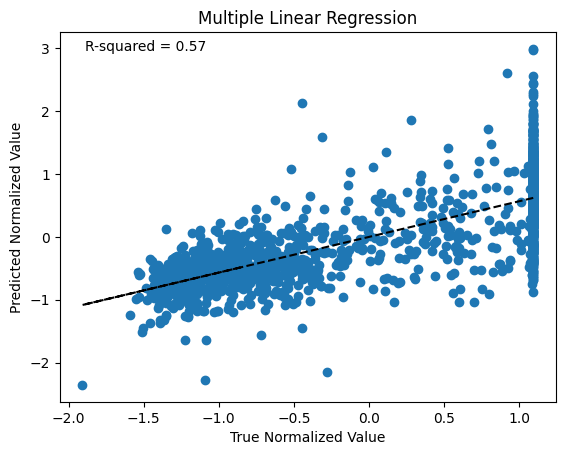

In [17]:
## Plot multiple linear regression model accuracy

# Create scatter object
plt.scatter(y_test, predictions_MLR)
plt.xlabel('True Normalized Value')
plt.ylabel('Predicted Normalized Value')
plt.title('Multiple Linear Regression')

# Calculate the best-fit line coefficients
fit = np.polyfit(y_test, predictions_MLR, 1)
fit_fn = np.poly1d(fit)

# Plot the best-fit line
plt.plot(y_test, fit_fn(y_test), '--k')

# Calculate and print the R-squared value
correlation_matrix = np.corrcoef(y_test, predictions_MLR)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
plt.text(0.05, 0.95, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

In [18]:
# Define input data for UMAP
X = df_scaled
sen = np.array(df.iloc[:, pterm]) # non normalized state to color
sen = sen/5 # normalized to framerate of movie to yield hours

# Perform dimensionality reduction with UMAP
reducer = umap.UMAP(n_components=2, random_state=None)
embedding = reducer.fit_transform(X)

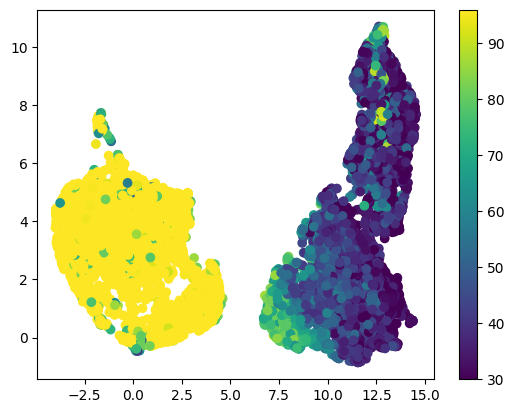

In [19]:
# Visualize the results
plt.scatter(embedding[:, 0], embedding[:, 1], c=sen) # color dots based on duration withdrawn from cell cycle during movie
plt.colorbar()
plt.clim(30, 96)
plt.show()

In [20]:
# Apply PHATE for dimensionality reduction
# doi: 10.1038/s41587-019-0336-3
import phate
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate = phate_operator.fit_transform(X)

Calculating PHATE...
  Running PHATE on 8180 observations and 7 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.77 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.81 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.51 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.96 seconds.
  Calculated landmark operator in 3.04 seconds.
  Calculating optimal t...
    Automatically selected t = 39
  Calculated optimal t in 2.26 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.57 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.11 seconds.
Calculated PHATE in 9.80 seconds.


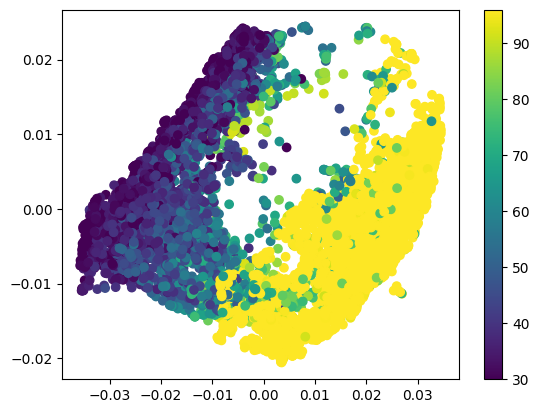

In [21]:
# Visualize the results
plt.scatter(Y_phate[:, 0], Y_phate[:, 1], c=sen) # color dots based on duration withdrawn from cell cycle during movie
plt.colorbar()
plt.clim(30, 96)
plt.show()